In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Load data

Данные с расписанием здач

* Task - название задачи
* start - дата начала выполнения задачи
* end - дата конца выполнения задачи
* Department - локация
* Completion - уровень завершенности задачи

Цель - построить по этим данным диаграмму Ганта

In [3]:
df = pd.read_csv('../data/schedule.csv')
df.head()

Task        start          end Department  Completion
0  Task A  14-Jun-2021  18-Jun-2021        Mkt         100
1  Task B  16-Jun-2021  24-Jun-2021        Fin         100
2  Task C  18-Jun-2021  22-Jun-2021        Fin         100
3  Task D  22-Jun-2021  25-Jun-2021        Mkt          90
4  Task E  22-Jun-2021  30-Jun-2021         HR          60

## Препроцессинг

In [4]:
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

Добавлние атрибута, отвечающего за длительность выполнения задачи

In [5]:
df['duration'] = df.end - df.start
df.duration = df.duration.apply(lambda x: x.days + 1)
df.head()

Task      start        end Department  Completion  duration
0  Task A 2021-06-14 2021-06-18        Mkt         100         5
1  Task B 2021-06-16 2021-06-24        Fin         100         9
2  Task C 2021-06-18 2021-06-22        Fin         100         5
3  Task D 2021-06-22 2021-06-25        Mkt          90         4
4  Task E 2021-06-22 2021-06-30         HR          60         9

Полезные переменные

In [6]:
df = df.sort_values(by='start', ascending=True)

p_start = df.start.min()
p_end = df.end.max()
p_duration = (p_end - p_start).days + 1

In [7]:
df['rel_start'] = df.start.apply(lambda x: (x - p_start).days)
df.head()

Task      start        end Department  Completion  duration  rel_start
0  Task A 2021-06-14 2021-06-18        Mkt         100         5          0
1  Task B 2021-06-16 2021-06-24        Fin         100         9          2
2  Task C 2021-06-18 2021-06-22        Fin         100         5          4
3  Task D 2021-06-22 2021-06-25        Mkt          90         4          8
4  Task E 2021-06-22 2021-06-30         HR          60         9          8

## Простая Диаграмма Ганта

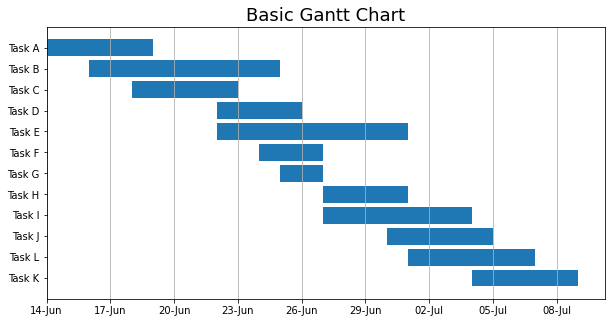

In [8]:
x_ticks = [i for i in range(p_duration + 1)]
x_labels = [(p_start + dt.timedelta(days=i)).strftime('%d-%b') 
          for i in x_ticks]

plt.figure(figsize=(10, 5))
plt.title('Basic Gantt Chart', size=18)
plt.barh(y=df.Task, left=df.rel_start, width=df.duration)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

## Диаграмма Ганта с процентов завершения

In [9]:
df['w_comp'] = round(df.Completion * df.duration / 100, 2)
df.head()

Task      start        end Department  Completion  duration  rel_start  \
0  Task A 2021-06-14 2021-06-18        Mkt         100         5          0   
1  Task B 2021-06-16 2021-06-24        Fin         100         9          2   
2  Task C 2021-06-18 2021-06-22        Fin         100         5          4   
3  Task D 2021-06-22 2021-06-25        Mkt          90         4          8   
4  Task E 2021-06-22 2021-06-30         HR          60         9          8   

   w_comp  
0     5.0  
1     9.0  
2     5.0  
3     3.6  
4     5.4

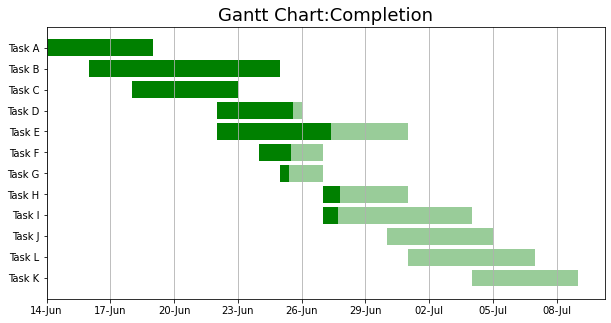

In [10]:
plt.figure(figsize=(10, 5))
plt.title('Gantt Chart:Completion', size=18)

# Light bar for entire task
plt.barh(y=df.Task, left=df.rel_start, width=df.duration, 
         alpha=0.4, color='green')

# Darker bar for completed part
plt.barh(y=df.Task, left=df.rel_start, width=df.w_comp, 
         alpha=1, color='green')

plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

## Диаграмма Ганта с распределением по подкатегориям

In [11]:
c_dict = {'Mkt': 'red', 'Fin': 'green', 'HR': 'blue'}

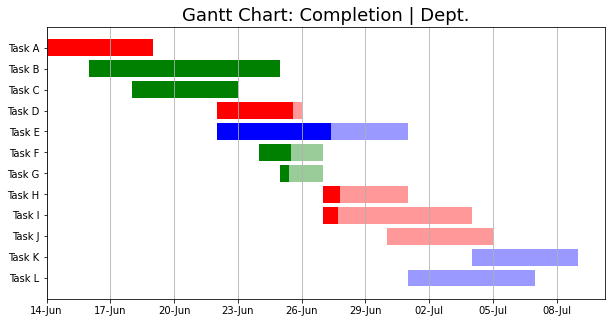

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Gantt Chart: Completion | Dept.', size=18)

for i in range(df.shape[0]):
    color = c_dict[df.Department[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.4, 
             color=color)
    
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color)
    
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

## Отобразжение процента завершенности в легенде

In [13]:
yticks = [i for i in range(len(df.Task))]

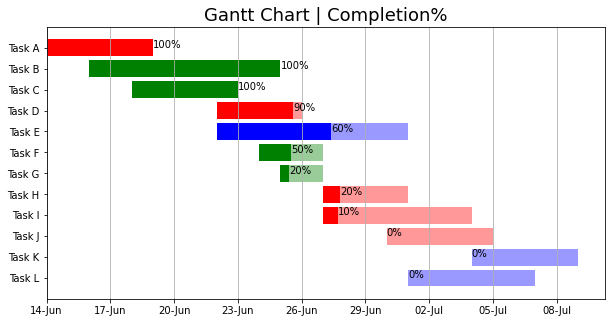

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Gantt Chart | Completion%', size=18)

for i in range(df.shape[0]):
    color = c_dict[df.Department[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.4, 
             color=color)
    
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color)
    
    plt.text(x=df.rel_start[i]+df.w_comp[i],
             y=yticks[i],
             s=f'{df.Completion[i]}%')
    
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()